<h1 align='center'> Abalone </h1>

### Context:

#### What is Abalon?

- Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. 
- Other common names are ear shells, sea ears, and muttonfish or muttonshells in Australia, ormer in the UK, perlemoen in South Africa, and paua in New Zealand.

### Objective :

Objective is to determine the age of Abalone from the physical measurements.

* The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

### Evaluation Criteria
Submissions are evaluated using Root-Mean-Squared-Error (RMSE).

### About the Data
The data set has 9 columns which have information related to physical measurements of abalones and the number of rings (representing age).


#### Data Description
* **Sex**: Sex (M: Male, F: Female, I: Infant)
* **Length**: Longest Shell measurement (millimetres - mm)
* **Diameter**: Diameter - perpendicular to length (mm)
* **Height**: Height - with meat in shell (mm)
* **Whole weight**: Weight of whole abalone (grams)
* **Shucked weight**: Weight of meat (grams)
* **Viscera weight**: Gut weight after bleeding (grams)
* **Shell weight**: Shell weight - after being dried (grams)
* **Rings**: Rings- value + 1.5 gives age in years (eg. 4 = 5.5 years)

#### Acknowledgement
This dataset is downloaded from the UCI Machine Learning Repository.

<hr>

### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

#### Loading Training Dataset

In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


#### Column Names 

In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

#### Renaming Columns 

In [4]:
df.rename(columns={ 'Whole weight' : 'Whole_weight' ,
                   'Shucked weight' : 'Shucked_weight',
                   'Viscera weight' : 'Viscera_weight',
                   'Shell weight' : 'Shell_weight'
                  },
         inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


### Inspecting Data

In [5]:
df.shape

(3132, 9)

- Training Dataset comprises 3132 observations(rows) and 9 features(columns).
- Out of the 9, one is the target variable and rest 8 are input variables.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole_weight    3132 non-null   float64
 5   Shucked_weight  3132 non-null   float64
 6   Viscera_weight  3132 non-null   float64
 7   Shell_weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


* Dataset has 7 Float columns, 1 integer columns, and 1 object type columns
- There are no missing values

In [7]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### Statistical Summary
- Get a Statistical Overview using Describe

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,3132.0,0.523707,0.119891,0.1100,0.450000,0.5450,0.6150,0.8150
Diameter,3132.0,0.407952,0.099336,0.0900,0.350000,0.4250,0.4800,0.6500
Height,3132.0,0.139277,0.038991,0.0000,0.115000,0.1400,0.1650,0.5150
Whole_weight,3132.0,0.828670,0.490630,0.0080,0.441500,0.7995,1.1530,2.8255
Shucked_weight,3132.0,0.359229,0.221946,0.0025,0.185375,0.3355,0.4995,1.4880
Viscera_weight,3132.0,0.180731,0.109924,0.0005,0.093375,0.1700,0.2525,0.7600
Shell_weight,3132.0,0.239159,0.139040,0.0030,0.130000,0.2350,0.3300,1.0050
Rings,3132.0,9.947957,3.230252,2.0000,8.000000,10.0000,11.0000,29.0000


### Inference:
- The  attributes(predictors) do not have a large difference between 75th %tile and max values .
- They neither have a large difference between Mean and Median values

Thus, the observation suggest that there are no extreme values i.e Outliers in our dataset.

### EDA - Explotary Data Analysis

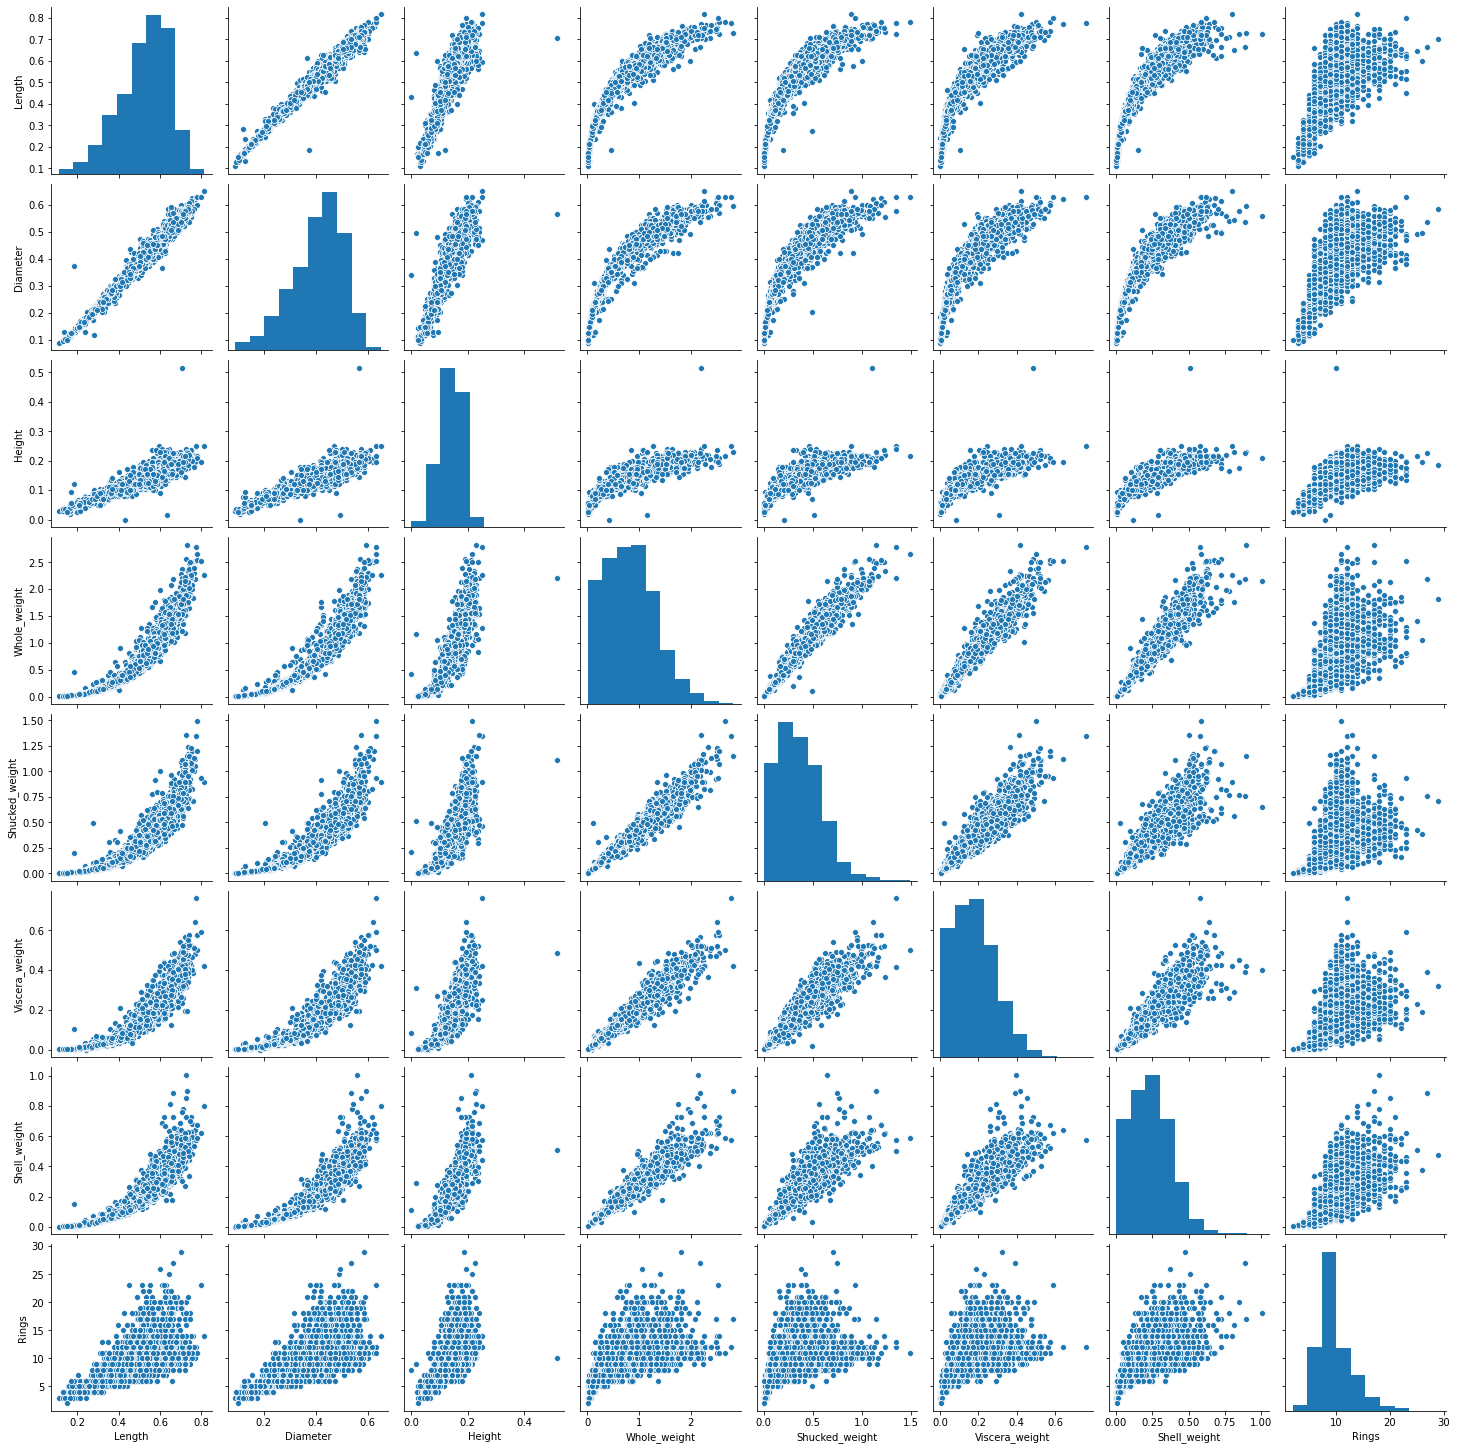

In [9]:
sns.pairplot(df)

Looking at scatterplot for the pair of variables, 
- We can see the positive linear correlation and, polynomial (curve-linear) correlation between variables .
- We can observe the upward trend, and also the points are not too dispersed.

#### Checking distributions 

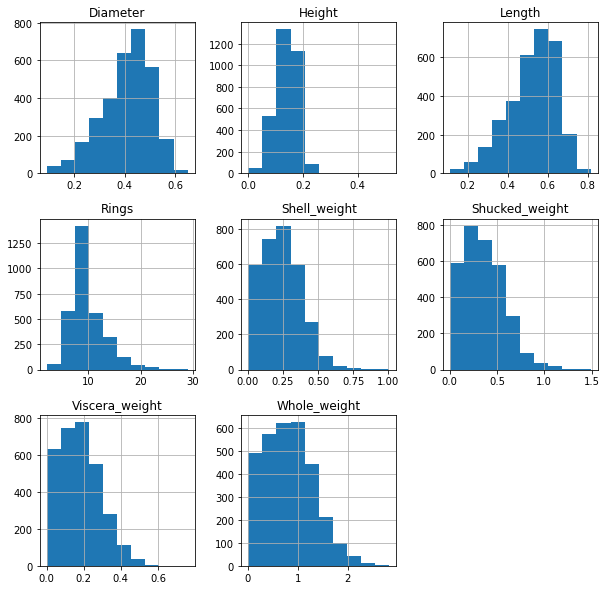

In [10]:
df.hist(figsize=(10,10))
plt.show()

### Inference :
- The attributes 'Diameter', 'Length' are quite normally distributed.
- The distribution of the other attributes seems to be positively skewed i.e the curve is shifted towards the left.

### Converting Textual data 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [12]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

- 0 Stands for Females(F)
- 1 Stands for I
- 2 Stands for Males(M)

### Analysing Categorical Variable

In [13]:
df['Sex'].value_counts()

2    1138
1    1013
0     981
Name: Sex, dtype: int64

- F has 981 records
- I has 1013 records
- M has 1138 records ( Highest No. of records )

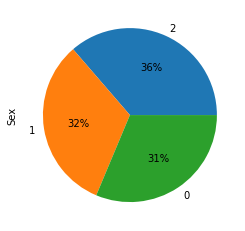

In [14]:
df['Sex'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- There is high percentage ( 36% )records of Male in dataset
- Females have least percentage ( 31% ) of records in dataset

### Correlation Matrix 

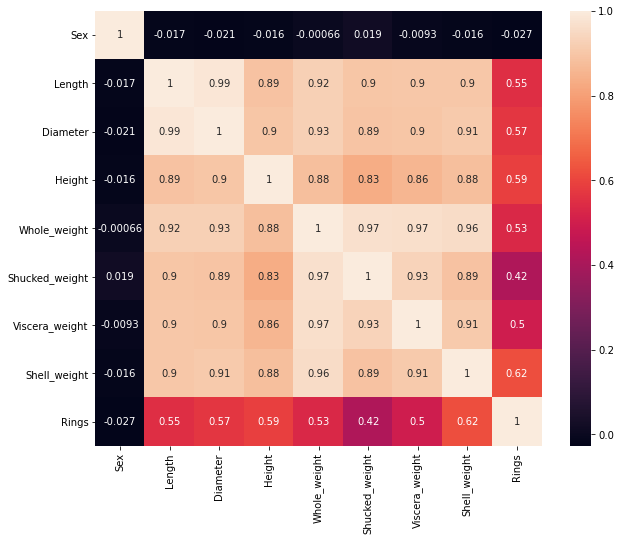

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### Inference
- **All the attributes** Length	Diameter, Height, Whole weight,	Shucked weight, Viscera weight, Shell weight have **high positive correlation** with each other. 
- Shell weight has high positive correlation with Rings
- Attribute Sex has **No Correlation or least correlation** with variables,  So the attribute Sex is irrelevent column

### Drop Irrelevent column

In [16]:
df = df.drop(['Sex'],  axis=1)

In [17]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


### Split data into x and y:

In [18]:
x = df.drop(['Rings'], axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208
1,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140
2,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780
3,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600
4,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345


In [19]:
y = df.Rings
y.head()

0    10
1     9
2    18
3    19
4    12
Name: Rings, dtype: int64

### Spliting dataset into test and training data 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

<h2 align='center'> RandomForest </h2>

### Training Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(n_estimators= 1000, random_state= 42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Prediction on Training and Test set

In [23]:
train_pred = rf.predict(x_train)
pred = rf.predict(x_test)

#### Accuracy on Training and Test dataset

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print("Training Accuracy: ", r2_score(y_train, train_pred))
print("Test Accuracy: ", r2_score(y_test, pred))

Training Accuracy:  0.9364092497473488
Test Accuracy:  0.5151497652348663


- Test Accuracy is very less then Training Accuracy

#### RMSE Value on Training and Test Dataset 

In [26]:
print("RMSE on Training Data: ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE on Training Data:  0.8242867703321008
RMSE On Test Data:  2.184183722593535


* The RMSE on Test data is much higher than Training Dataset

### Vizualising Results 

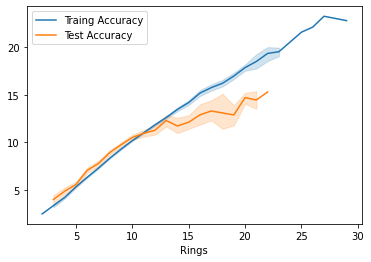

In [27]:
sns.lineplot(y_train, train_pred, label='Traing Accuracy')
sns.lineplot(y_test, pred, label = 'Test Accuracy')
plt.show()

### Hyper-parameter tunning
* Tried to reduce RMSE Value 
* Tried to reduce the difference of training and test dataset

In [28]:
rf1 = RandomForestRegressor(n_estimators= 250, 
                            max_depth= 8 , max_features = 5 , min_samples_split=3, max_leaf_nodes=100,
                            random_state= 42)
# Training Model
rf1.fit(x_train, y_train)

# Prediction 
rf1_pred_train = rf1.predict(x_train)
rf1_pred = rf1.predict(x_test)

#### Accuracy on Training and Test Dataset 

In [29]:
print("Training Accuracy: ", r2_score(y_train, rf1_pred_train))
print("Test Accuracy: ", r2_score(y_test, rf1_pred))

Training Accuracy:  0.7565707561596207
Test Accuracy:  0.5237749359646838


- Test Accuracy increases by 1% but Training Accuracy decreases drastically

#### RMSE Value on Training and Test set 

In [30]:
print("RMSE on Training Data: ", np.sqrt(mean_squared_error(y_train, rf1_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, rf1_pred)))

RMSE on Training Data:  1.6127525235471567
RMSE On Test Data:  2.1646689394970013


- There is slight difference in RMSE of Test accuracy

### Visualising Results 

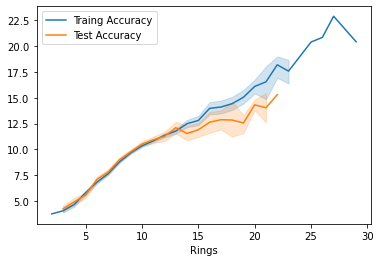

In [31]:
sns.lineplot(y_train, rf1_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, rf1_pred, label = 'Test Accuracy')
plt.show()

<h2 align='center'> XG-Boost </h2>

In [32]:
import xgboost as xgb

#### Training Model 

In [33]:
xg = xgb.XGBRegressor(max_depth=5, n_estimators = 250, learning_rate=0.1, n_jobs = -1)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Test and Training Set 

In [34]:
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

#### Accuracy on Training and Test Set 

In [35]:
print("Training Accuracy: ", r2_score(y_train, xg_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg_pred))

Training Accuracy:  0.9180215549932189
Test Accuracy:  0.4974248557805844


* Test set accuracy is lesser than Training set accuracy

#### RMSE Value on Training and Test Set 

In [36]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, xg_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg_pred)))

RMSE On Trainng Data:  0.9359037624867366
RMSE On Test Data:  2.2237495033954544


* RMSE Value on Test data is high


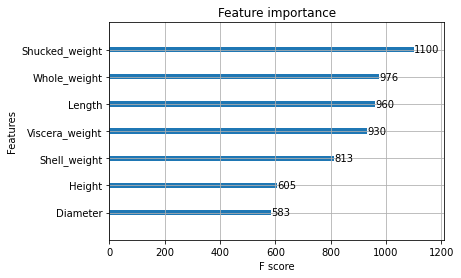

In [37]:
xgb.plot_importance(xg)

### Visualising Results 

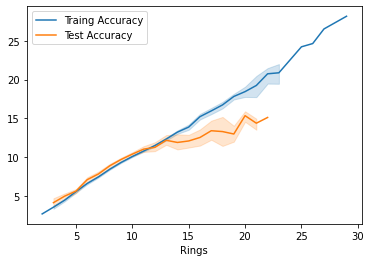

In [38]:
sns.lineplot(y_train, xg_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg_pred, label = 'Test Accuracy')
plt.show()

### Hyper-parameter tunning

In [39]:
xg2 = xgb.XGBRegressor(max_depth=5, n_estimators = 250, learning_rate=0.03,
                       colsample_bytree=0.6, gamma = 0.2, reg_alpha = 1, subsample = 0.9,
                       n_jobs = -1, random_state =42)

xg2.fit(x_train, y_train)

# Prediction on Test and Training Set
xg2_pred_train = xg2.predict(x_train)
xg2_pred = xg2.predict(x_test)

#### Accuracy on Training and Test Set 

In [40]:
print("Training Accuracy: ", r2_score(y_train, xg2_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg2_pred))

Training Accuracy:  0.764832032765993
Test Accuracy:  0.5147799076988726


- Training accuracy drastically decreases,  and Test Accuracy is increased by 2%

#### RMSE Value on Training and Test Set 

In [41]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, xg2_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg2_pred)))

RMSE On Trainng Data:  1.5851502652226006
RMSE On Test Data:  2.1850166424834283


- RMSE on Test set decreases slightly

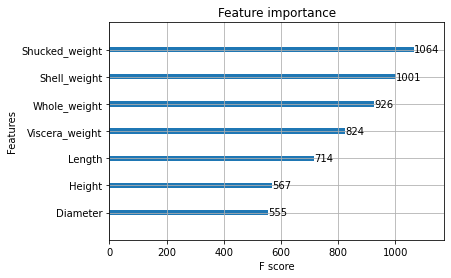

In [42]:
xgb.plot_importance(xg2)

### Visualising Results 

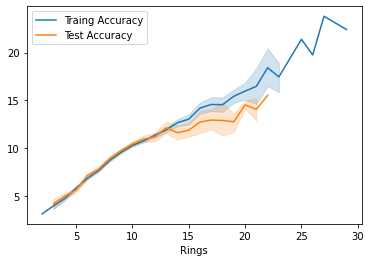

In [43]:
sns.lineplot(y_train, xg2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg2_pred, label = 'Test Accuracy')
plt.show()

<h1 align='center'> Test- Dataset </h1>

In [44]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


### Renaming Columns

In [45]:
test_data.rename(columns={ 'Whole weight' : 'Whole_weight' ,
                   'Shucked weight' : 'Shucked_weight',
                   'Viscera weight' : 'Viscera_weight',
                   'Shell weight' : 'Shell_weight'
                  },
         inplace = True)
test_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [46]:
t = test_data.drop(['Sex'], axis=1)
t.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [47]:
print("Shape of Test Dataset", t.shape)

Shape of Test Dataset (1044, 7)


### Predicting Value Using Random-Forest 

In [48]:
ypred = rf1.predict(t)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [49]:
result = pd.DataFrame(ypred) 
result.index = test_data.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_RandomForest.csv",index=False)

In [50]:
pd.read_csv('Prediction_results_RandomForest.csv')

,prediction
0,10.089710
1,6.709597
2,7.464709
3,11.548098
4,9.155907
...,...
1039,5.359531
1040,8.689006
1041,8.263811
1042,10.625131


<h1 align='center'> RMSE Value on Test Dataset : 2.08601 </h1>

### Prediction Using XG-Boost

In [51]:
ypred = xg2.predict(t)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [52]:
result = pd.DataFrame(ypred) 
result.index = test_data.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_XGBoost.csv",index=False)

In [53]:
pd.read_csv('Prediction_results_XGBoost.csv')

,prediction
0,10.304301
1,7.030162
2,7.691166
3,12.158744
4,9.062216
...,...
1039,5.403115
1040,8.684564
1041,8.208712
1042,10.629803


<h1 align='center'> RMSE Value on Test Dataset : 2.057884 </h1>

## Conclusion :

<hr>

### **Results:**

- RandomForest: 2.08601 
- XG Boost: 2.057884

By XGBoost we got the Least RMSE on Test Dataset ie, It is more accurate in predicting the age of Abalone from physical measurements